In [0]:
data = dbutils.fs.ls("/Volumes/retailstore_analysis/retailschema/myvolume")

[FileInfo(path='dbfs:/Volumes/retailstore_analysis/retailschema/myvolume/Retail Store Dataset.xlsx', name='Retail Store Dataset.xlsx', size=59559, modificationTime=1765821486000)]

In [0]:
%python
import pandas as pd
import numpy as np
# Convert to pandas DataFrame
retail_df = pd.DataFrame(data)

# Show first 5 rows
retail_df.head()


,TransactionID,CustomerID,Product,Quantity,Price,Store,Date
0,1,1051,Mobile,2,1775,Store A,2025-01-01
1,2,1092,Laptop,3,552,Store A,2025-01-02
2,3,1014,Headphones,2,1160,Store B,2025-01-03
3,4,1071,Headphones,3,1283,Store A,2025-01-04
4,5,1060,Headphones,1,1114,Store C,2025-01-05


In [0]:
# Total sales per product
retail_df['TotalSales'] = retail_df['Quantity'] * retail_df['Price']
product_sales = retail_df.groupby('Product')[['TotalSales', 'Quantity']].sum().reset_index()
print("Product Sales:")
print(product_sales)

# Total sales per store
store_sales = retail_df.groupby('Store')['TotalSales'].sum().reset_index()
print("\nStore Sales:")
print(store_sales)

# Top 5 customers by spending
top_customers = retail_df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Spending:")
print(top_customers)


Product Sales:
      Product  TotalSales  Quantity
0      Camera       56584        50
1  Headphones       63894        64
2      Laptop       57188        64
3      Mobile       29674        29
4      Tablet       61674        57

Store Sales:
     Store  TotalSales
0  Store A       73947
1  Store B      119039
2  Store C       76028

Top 5 Customers by Spending:
CustomerID
1061    23128
1001    14507
1003    11012
1052    10645
1014    10263
Name: TotalSales, dtype: int64


/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176754-1082937353:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='TotalSales', data=product_sales, palette='viridis')


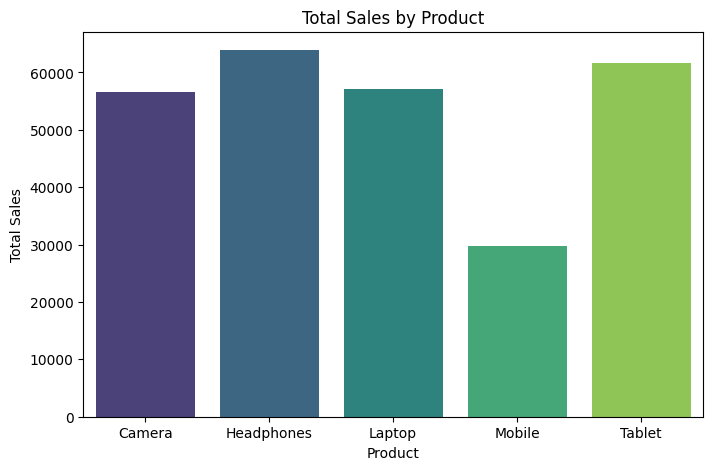

/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176754-1082937353:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='TotalSales', data=store_sales, palette='magma')


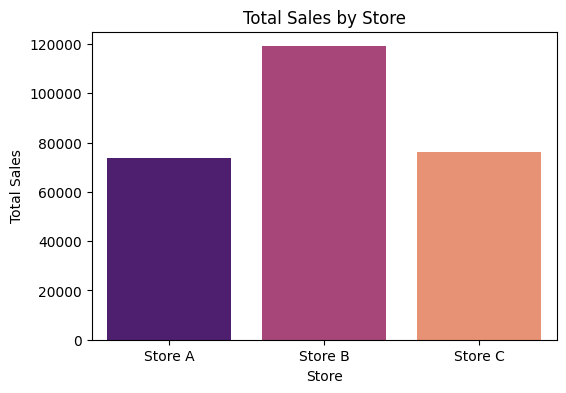

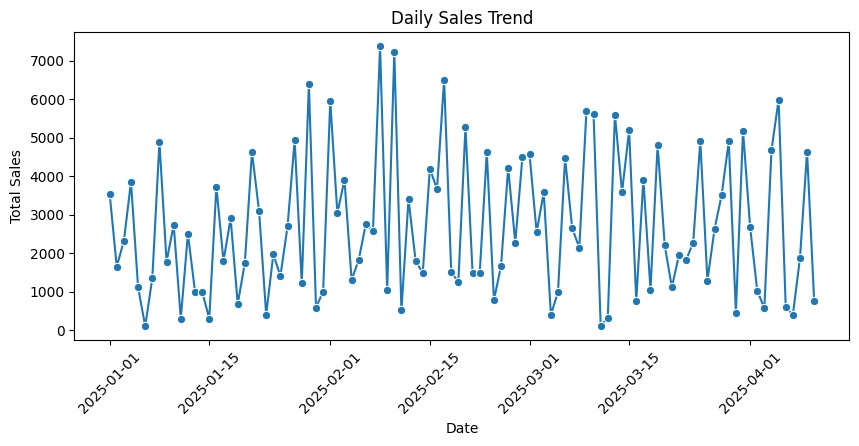

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Total Sales by Product
plt.figure(figsize=(8,5))
sns.barplot(x='Product', y='TotalSales', data=product_sales, palette='viridis')
plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.show()

# 2️⃣ Total Sales by Store
plt.figure(figsize=(6,4))
sns.barplot(x='Store', y='TotalSales', data=store_sales, palette='magma')
plt.title('Total Sales by Store')
plt.ylabel('Total Sales')
plt.show()

# 3️⃣ Sales Trend over Time
sales_trend = retail_df.groupby('Date')['TotalSales'].sum().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x='Date', y='TotalSales', data=sales_trend, marker='o')
plt.title('Daily Sales Trend')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [0]:
%python
# Total sales per transaction (already done before)
retail_df['TotalSales'] = retail_df['Quantity'] * retail_df['Price']

# Extract month and day from Date for trend analysis
retail_df['Month'] = retail_df['Date'].dt.month
retail_df['DayOfWeek'] = retail_df['Date'].dt.day_name()


In [0]:
# Top 5 products by total sales
top_products = retail_df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:\n", top_products)

# Average quantity sold per product
avg_quantity = retail_df.groupby('Product')['Quantity'].mean().sort_values(ascending=False)
print("\nAverage Quantity Sold per Product:\n", avg_quantity)


Top 5 Products by Sales:
 Product
Headphones    63894
Tablet        61674
Laptop        57188
Camera        56584
Mobile        29674
Name: TotalSales, dtype: int64

Average Quantity Sold per Product:
 Product
Camera        2.941176
Headphones    2.782609
Tablet        2.714286
Mobile        2.416667
Laptop        2.370370
Name: Quantity, dtype: float64


Correlation:
             Quantity     Price  TotalSales
Quantity    1.000000 -0.052937    0.609038
Price      -0.052937  1.000000    0.686436
TotalSales  0.609038  0.686436    1.000000


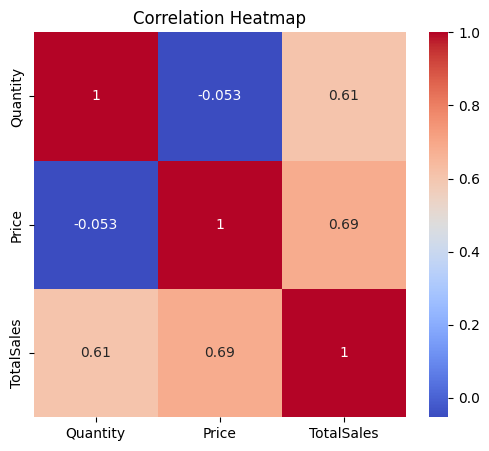

In [0]:
# Correlation between Quantity, Price, and TotalSales
correlation = retail_df[['Quantity', 'Price', 'TotalSales']].corr()
print("Correlation:\n", correlation)

# Heatmap of correlations
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176759-2019575287:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette='magma', ax=axes[0,1])
/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176759-2019575287:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='cividis', ax=axes[1,1])


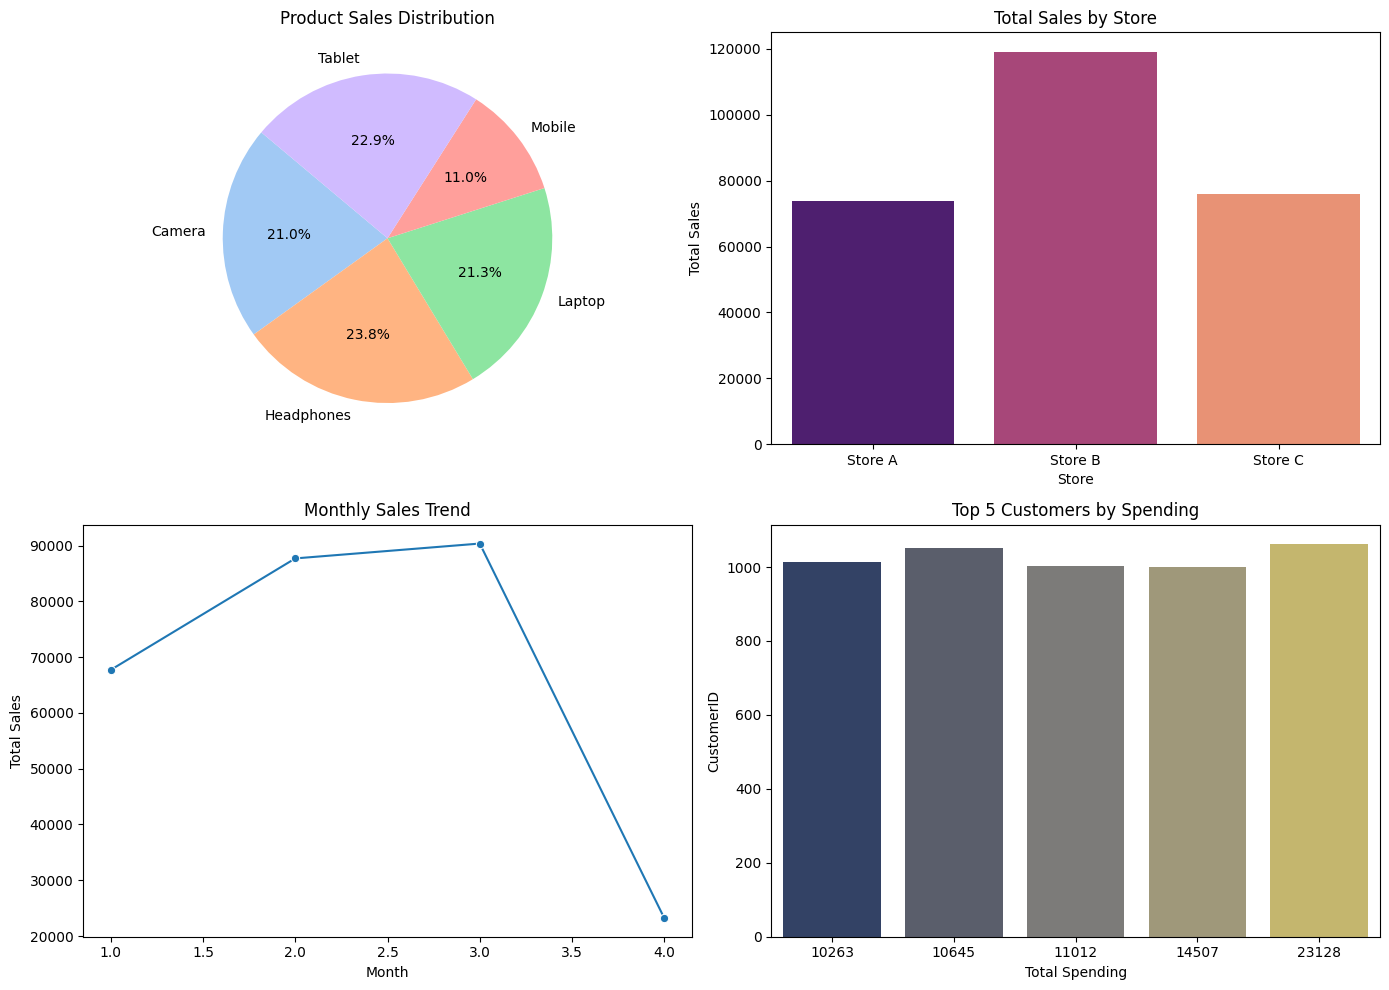

In [0]:
%python
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
product_sales = retail_df.groupby('Product')['TotalSales'].sum()
store_sales = retail_df.groupby('Store')['TotalSales'].sum()
monthly_sales = retail_df.groupby('Month')['TotalSales'].sum()
top_customers = retail_df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(5)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Pie chart: Product Sales Distribution
axes[0,0].pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0,0].set_title('Product Sales Distribution')

# 2️⃣ Bar chart: Store Sales
sns.barplot(x=store_sales.index, y=store_sales.values, palette='magma', ax=axes[0,1])
axes[0,1].set_title('Total Sales by Store')
axes[0,1].set_ylabel('Total Sales')

# 3️⃣ Line chart: Monthly Sales Trend
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', ax=axes[1,0])
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Total Sales')

# 4️⃣ Horizontal bar chart: Top 5 Customers
sns.barplot(x=top_customers.values, y=top_customers.index, palette='cividis', ax=axes[1,1])
axes[1,1].set_title('Top 5 Customers by Spending')
axes[1,1].set_xlabel('Total Spending')
axes[1,1].set_ylabel('CustomerID')

plt.tight_layout()
plt.show()


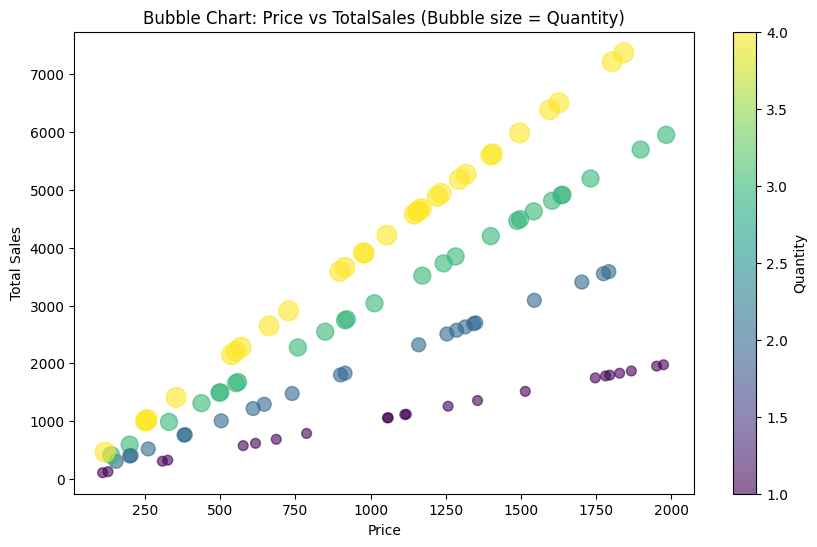

In [0]:
%python
import matplotlib.pyplot as plt

# Create a bubble chart
plt.figure(figsize=(10,6))

# X-axis: Price, Y-axis: TotalSales, Bubble size: Quantity
plt.scatter(
    x=retail_df['Price'],
    y=retail_df['TotalSales'],
    s=retail_df['Quantity']*50,  # bubble size (scaled for visibility)
    alpha=0.6,
    c=retail_df['Quantity'],      # color represents Quantity
    cmap='viridis'
)

plt.colorbar(label='Quantity')  # color legend
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.title('Bubble Chart: Price vs TotalSales (Bubble size = Quantity)')
plt.show()


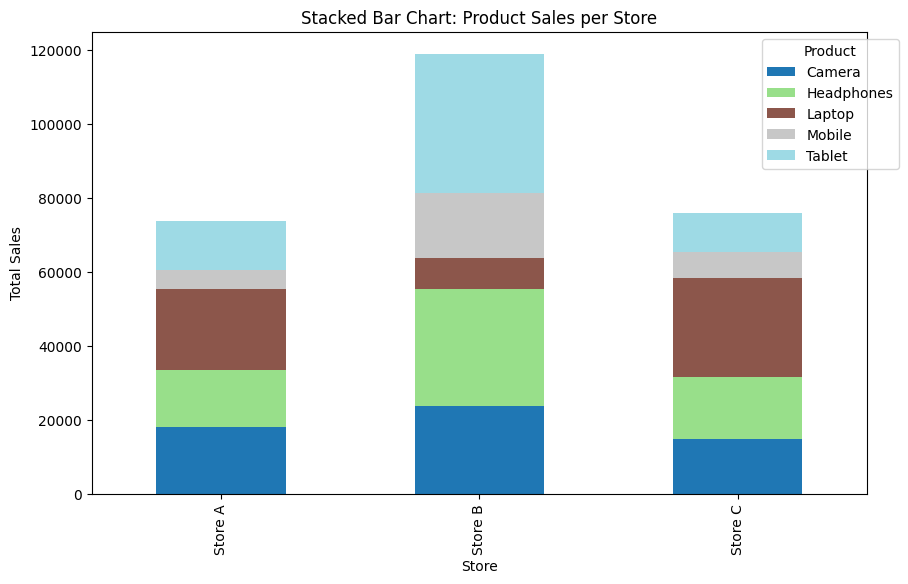

In [0]:
%python
import matplotlib.pyplot as plt
import pandas as pd

# Pivot table: Products as columns, Stores as rows
store_product = retail_df.pivot_table(index='Store', columns='Product', values='TotalSales', aggfunc='sum').fillna(0)

# Plot stacked bar chart
store_product.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Stacked Bar Chart: Product Sales per Store")
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1))
plt.show()


/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176763-3198863211:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Price', data=retail_df, palette='Set3')


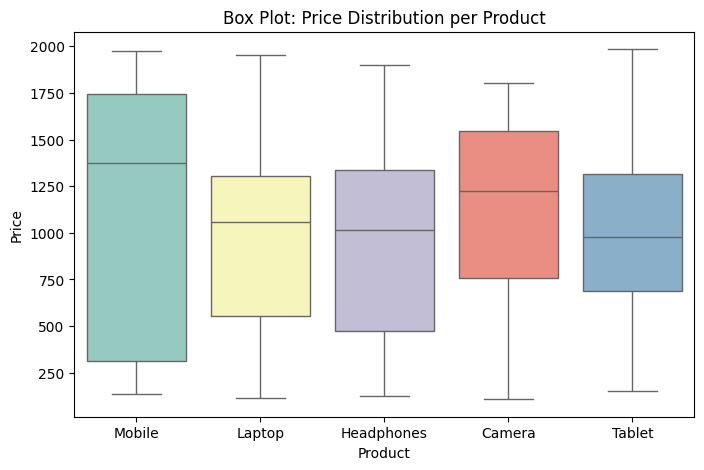

In [0]:
%python
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Product', y='Price', data=retail_df, palette='Set3')
plt.title("Box Plot: Price Distribution per Product")
plt.ylabel("Price")
plt.xlabel("Product")
plt.show()


/home/spark-9c14f621-fb9c-41ef-a561-08/.ipykernel/2420/command-8743610685176764-4155547786:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Product', y='Quantity', data=retail_df, palette='Pastel1')


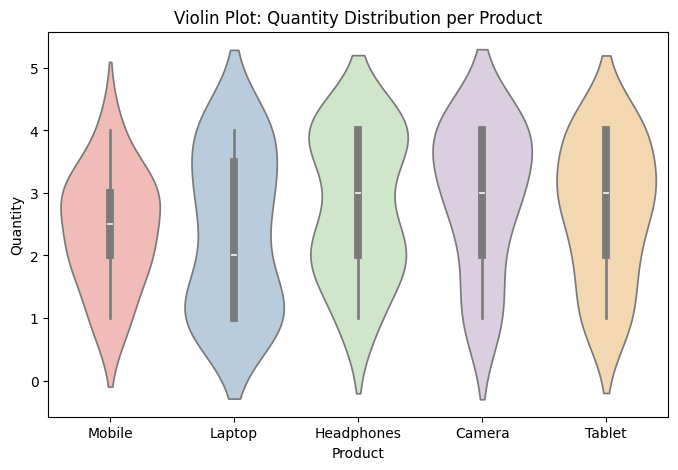

In [0]:
%python
plt.figure(figsize=(8,5))
sns.violinplot(x='Product', y='Quantity', data=retail_df, palette='Pastel1')
plt.title("Violin Plot: Quantity Distribution per Product")
plt.ylabel("Quantity")
plt.xlabel("Product")
plt.show()


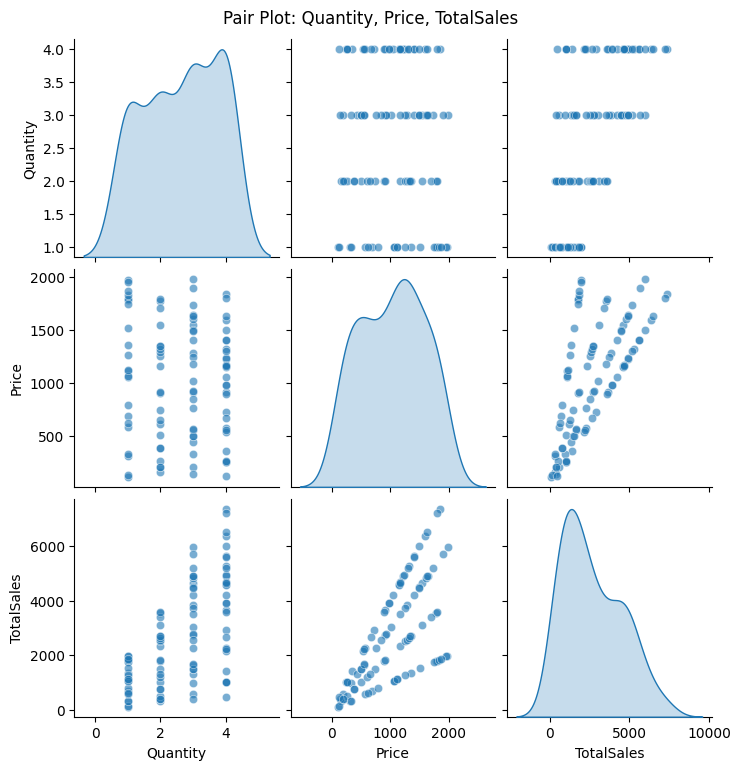

In [0]:
%python
sns.pairplot(retail_df[['Quantity', 'Price', 'TotalSales']], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot: Quantity, Price, TotalSales", y=1.02)
plt.show()
